In [1]:
import pandas as pd
import re
import string 
import nltk 
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('imdb.csv')

In [4]:
stop_words = set(stopwords.words('english'))
negations = {"no", "not", "nor", "never"}
stop_words = stop_words - negations

In [5]:
#Cleaning function 
def clean_text(text):
    text = str(text).lower() 
    text =  re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [6]:
df['clean_text'] = df['text'].apply(clean_text)


In [7]:
df = df[df['clean_text'].str.strip() != '']
df = df.dropna(subset=['clean_text'])


In [8]:
df = df.drop_duplicates(subset=['clean_text'])

In [9]:
df[['text', 'clean_text', 'label']].to_csv('imdb_cleaned.csv', index=False)


In [10]:
df[['text', 'clean_text', 'label']].head()

,text,clean_text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,rented curiousyellow video store controversy s...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",curious yellow risible pretentious steaming pi...,0
2,If only to avoid making this type of film in t...,avoid making type film future film interesting...,0
3,This film was probably inspired by Godard's Ma...,film probably inspired godards masculin fémini...,0
4,"Oh, brother...after hearing about this ridicul...",oh brotherafter hearing ridiculous film umptee...,0


In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [12]:
#preparing lables and features
X = df['clean_text'] 
y = df['label']   

In [13]:
#split into training and testing unit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
#Vectorize the text data using TD-IF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
#Traing the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [16]:
#Make predictions on the test set
y_pred = logreg.predict(X_test_tfidf)


In [17]:
#Evaluate the model ( Cell no.129, 133,135)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8825537040754868


In [18]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      2486
           1       0.87      0.90      0.88      2495

    accuracy                           0.88      4981
   macro avg       0.88      0.88      0.88      4981
weighted avg       0.88      0.88      0.88      4981



In [19]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[2151  335]
 [ 250 2245]]


In [20]:
print("Training Set:")
print(X_train.head())
print(y_train.head())


Training Set:
2725     movie seemed going good camera sound film sets...
11028    one previous reviewer called film pure visual ...
1209     one seriously disturbed movie even though boys...
18931    example world war documentary madeusing first ...
16101    wasnt sure expect movie considering amazing co...
Name: clean_text, dtype: object
2725     0
11028    0
1209     0
18931    1
16101    1
Name: label, dtype: int64


In [21]:
print("\nTesting Set:")
print(X_test.head())
print(y_test.head())


Testing Set:
117      film lot promise plot relatively interesting h...
6768     felt movie started well acting spot felt chara...
10683    poor ingrid suffered suffered went italy tired...
190      story norman maclean masterwork redfords film ...
4624     want say production one sided breaks impartial...
Name: clean_text, dtype: object
117      0
6768     0
10683    0
190      0
4624     0
Name: label, dtype: int64


In [22]:
# Combine X_train and y_train into a DataFrame for easier viewing
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

print("Training Set Sample:")
print(train_df.head())

print("\nTesting Set Sample:")
print(test_df.head())

Training Set Sample:
                                                    text  label
2725   movie seemed going good camera sound film sets...      0
11028  one previous reviewer called film pure visual ...      0
1209   one seriously disturbed movie even though boys...      0
18931  example world war documentary madeusing first ...      1
16101  wasnt sure expect movie considering amazing co...      1

Testing Set Sample:
                                                    text  label
117    film lot promise plot relatively interesting h...      0
6768   felt movie started well acting spot felt chara...      0
10683  poor ingrid suffered suffered went italy tired...      0
190    story norman maclean masterwork redfords film ...      0
4624   want say production one sided breaks impartial...      0


In [23]:
#Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
# 1. Train the Naïve Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
# 2. Make predictions
y_pred_nb = nb.predict(X_test_tfidf)

In [26]:
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.8604697851836981

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2486
           1       0.87      0.85      0.86      2495

    accuracy                           0.86      4981
   macro avg       0.86      0.86      0.86      4981
weighted avg       0.86      0.86      0.86      4981


Confusion Matrix:
 [[2176  310]
 [ 385 2110]]


In [27]:
#Comparing results from both the models 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression metrics
logreg_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-score': f1_score(y_test, y_pred, average='weighted')
}

In [28]:
# Naive Bayes metrics
nb_metrics = {
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_nb, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_nb, average='weighted')
}

In [29]:
results_df = pd.DataFrame([logreg_metrics, nb_metrics])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.882554   0.882993  0.882554  0.882516
1          Naive Bayes  0.860470   0.860805  0.860470  0.860442


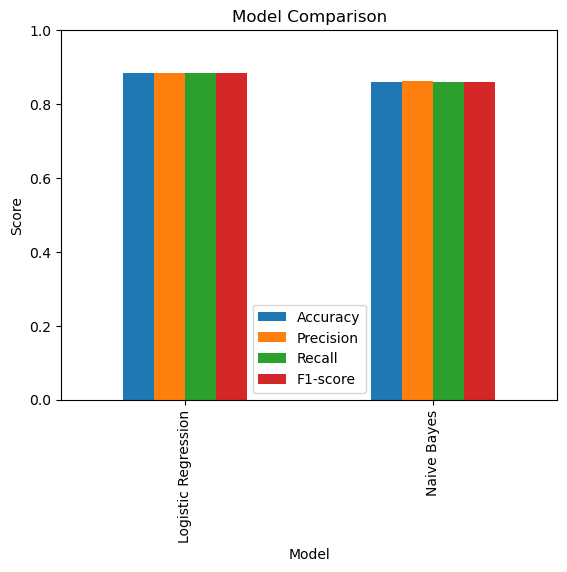

In [30]:
import matplotlib.pyplot as plt

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-score']].plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred_dt = dt.predict(X_test_tfidf)


In [34]:
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
    'F1-score': f1_score(y_test, y_pred_dt, average='weighted')}

In [35]:
results_df = pd.DataFrame([logreg_metrics, nb_metrics, dt_metrics])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.882554   0.882993  0.882554  0.882516
1          Naive Bayes  0.860470   0.860805  0.860470  0.860442
2        Decision Tree  0.718330   0.718330  0.718330  0.718329


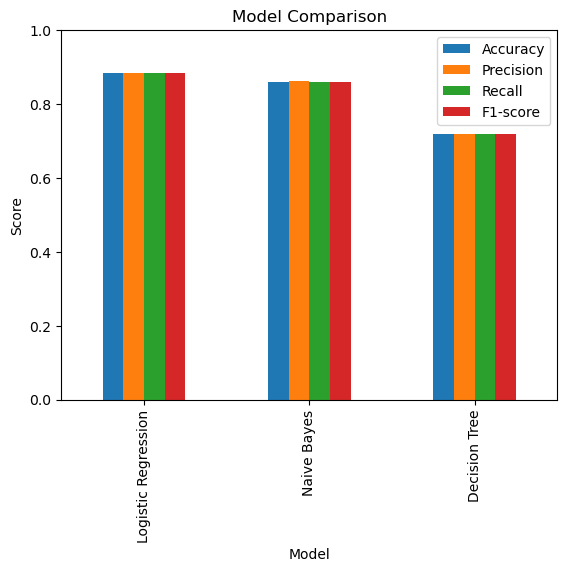

In [36]:
import matplotlib.pyplot as plt

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-score']].plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [37]:
# Make sure logreg, nb, dt, and vectorizer are already defined and trained!

models = {
    'Logistic Regression': logreg,
    'Naive Bayes': nb,
    'Decision Tree': dt
}

def predict_sentiment(text, model_choice='Logistic Regression'):
    X_new = vectorizer.transform([text])
    model = models[model_choice]
    pred = model.predict(X_new)[0]
    sentiment_map = {0: 'Negative', 1: 'Positive'}
    return sentiment_map[pred]

In [38]:
# Get user input
user_text = input("Enter a review for sentiment analysis: ")
model_choice = input("Choose model (Logistic Regression, Naive Bayes, Decision Tree): ").title()
if model_choice not in models:
    print("Invalid model choice. Using Logistic Regression by default.")
    model_choice = 'Logistic Regression'
result = predict_sentiment(user_text, model_choice)
print(f"Predicted Sentiment: {result}")

Enter a review for sentiment analysis:  it was a bad movie
Choose model (Logistic Regression, Naive Bayes, Decision Tree):  Naive Bayes


Predicted Sentiment: Negative


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])  # df['text'] is your cleaned text column

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

models = {
       'Logistic Regression': LogisticRegression(max_iter=1000),
       'Naive Bayes': MultinomialNB(),
       'Decision Tree': DecisionTreeClassifier()
   }

for name, model in models.items():
    model.fit(X, y)  # y is your label column

In [80]:
import joblib

joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(models['Logistic Regression'], 'logreg.joblib')
joblib.dump(models['Naive Bayes'], 'nb.joblib')
joblib.dump(models['Decision Tree'], 'dt.joblib')

['dt.joblib']

In [83]:

# Load vectorizer and models
vectorizer = joblib.load('vectorizer.joblib')
models = {
    'Logistic Regression': joblib.load('logreg.joblib'),
    'Naive Bayes': joblib.load('nb.joblib'),
    'Decision Tree': joblib.load('dt.joblib')
}

In [84]:
def predict_sentiment(text, model_choice='Logistic Regression'):
    X_new = vectorizer.transform([text])
    model = models[model_choice]
    pred = model.predict(X_new)[0]
    sentiment_map = {0: 'Negative', 1: 'Positive'}
    return sentiment_map[pred]